Caitlin Lindsay Chosen Dataset: Abalone (https://archive.ics.uci.edu/dataset/1/abalone) - regression problem

In [23]:
!pip install ucimlrepo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [1]:
'''#Import dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features
y = abalone.data.targets 
  
# metadata 
#print(abalone.metadata) 
print("\n")  
# variable information 
print(abalone.variables) '''

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mice_protein_expression = fetch_ucirepo(id=342) 
  
# data (as pandas dataframes) 
X = mice_protein_expression.data.features 
y = mice_protein_expression.data.targets 
  
# metadata 
print(mice_protein_expression.metadata) 
  
# variable information 
print(mice_protein_expression.variables) 


{'uci_id': 342, 'name': 'Mice Protein Expression', 'repository_url': 'https://archive.ics.uci.edu/dataset/342/mice+protein+expression', 'data_url': 'https://archive.ics.uci.edu/static/public/342/data.csv', 'abstract': 'Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.', 'area': 'Biology', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 1080, 'num_features': 80, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': ['MouseID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Tue Apr 16 2024', 'dataset_doi': '10.24432/C50S3Z', 'creators': ['Clara Higuera', 'Katheleen Gardiner', 'Krzysztof Cios'], 'intro_paper': {'title': 'Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model

In [10]:
print(y['class'])

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object


$\textbf{TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample}$

In [11]:
df = X.copy()
df['Class'] = y['class']

print(df.head())

   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0   2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1   2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2   2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
3   2.152301  0.207004  1.595086  ...  0.111262  0.391691   0.130405   
4   2.134014  0.192158  1.504230  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   Class  
0  0.131790  0.128186  1.675652   Control  

In [17]:
label_encoder = LabelEncoder()
categorical_columns = ['Genotype', 'Treatment', 'Behavior', 'Class']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
print(df.head())

   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0   2.373744  0.232224  1.750936  ...  0.108336  0.427099   0.114783   
1   2.292150  0.226972  1.596377  ...  0.104315  0.441581   0.111974   
2   2.283337  0.230247  1.561316  ...  0.106219  0.435777   0.111883   
3   2.152301  0.207004  1.595086  ...  0.111262  0.391691   0.130405   
4   2.134014  0.192158  1.504230  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  Class  
0  0.131790  0.128186  1.675652         0   

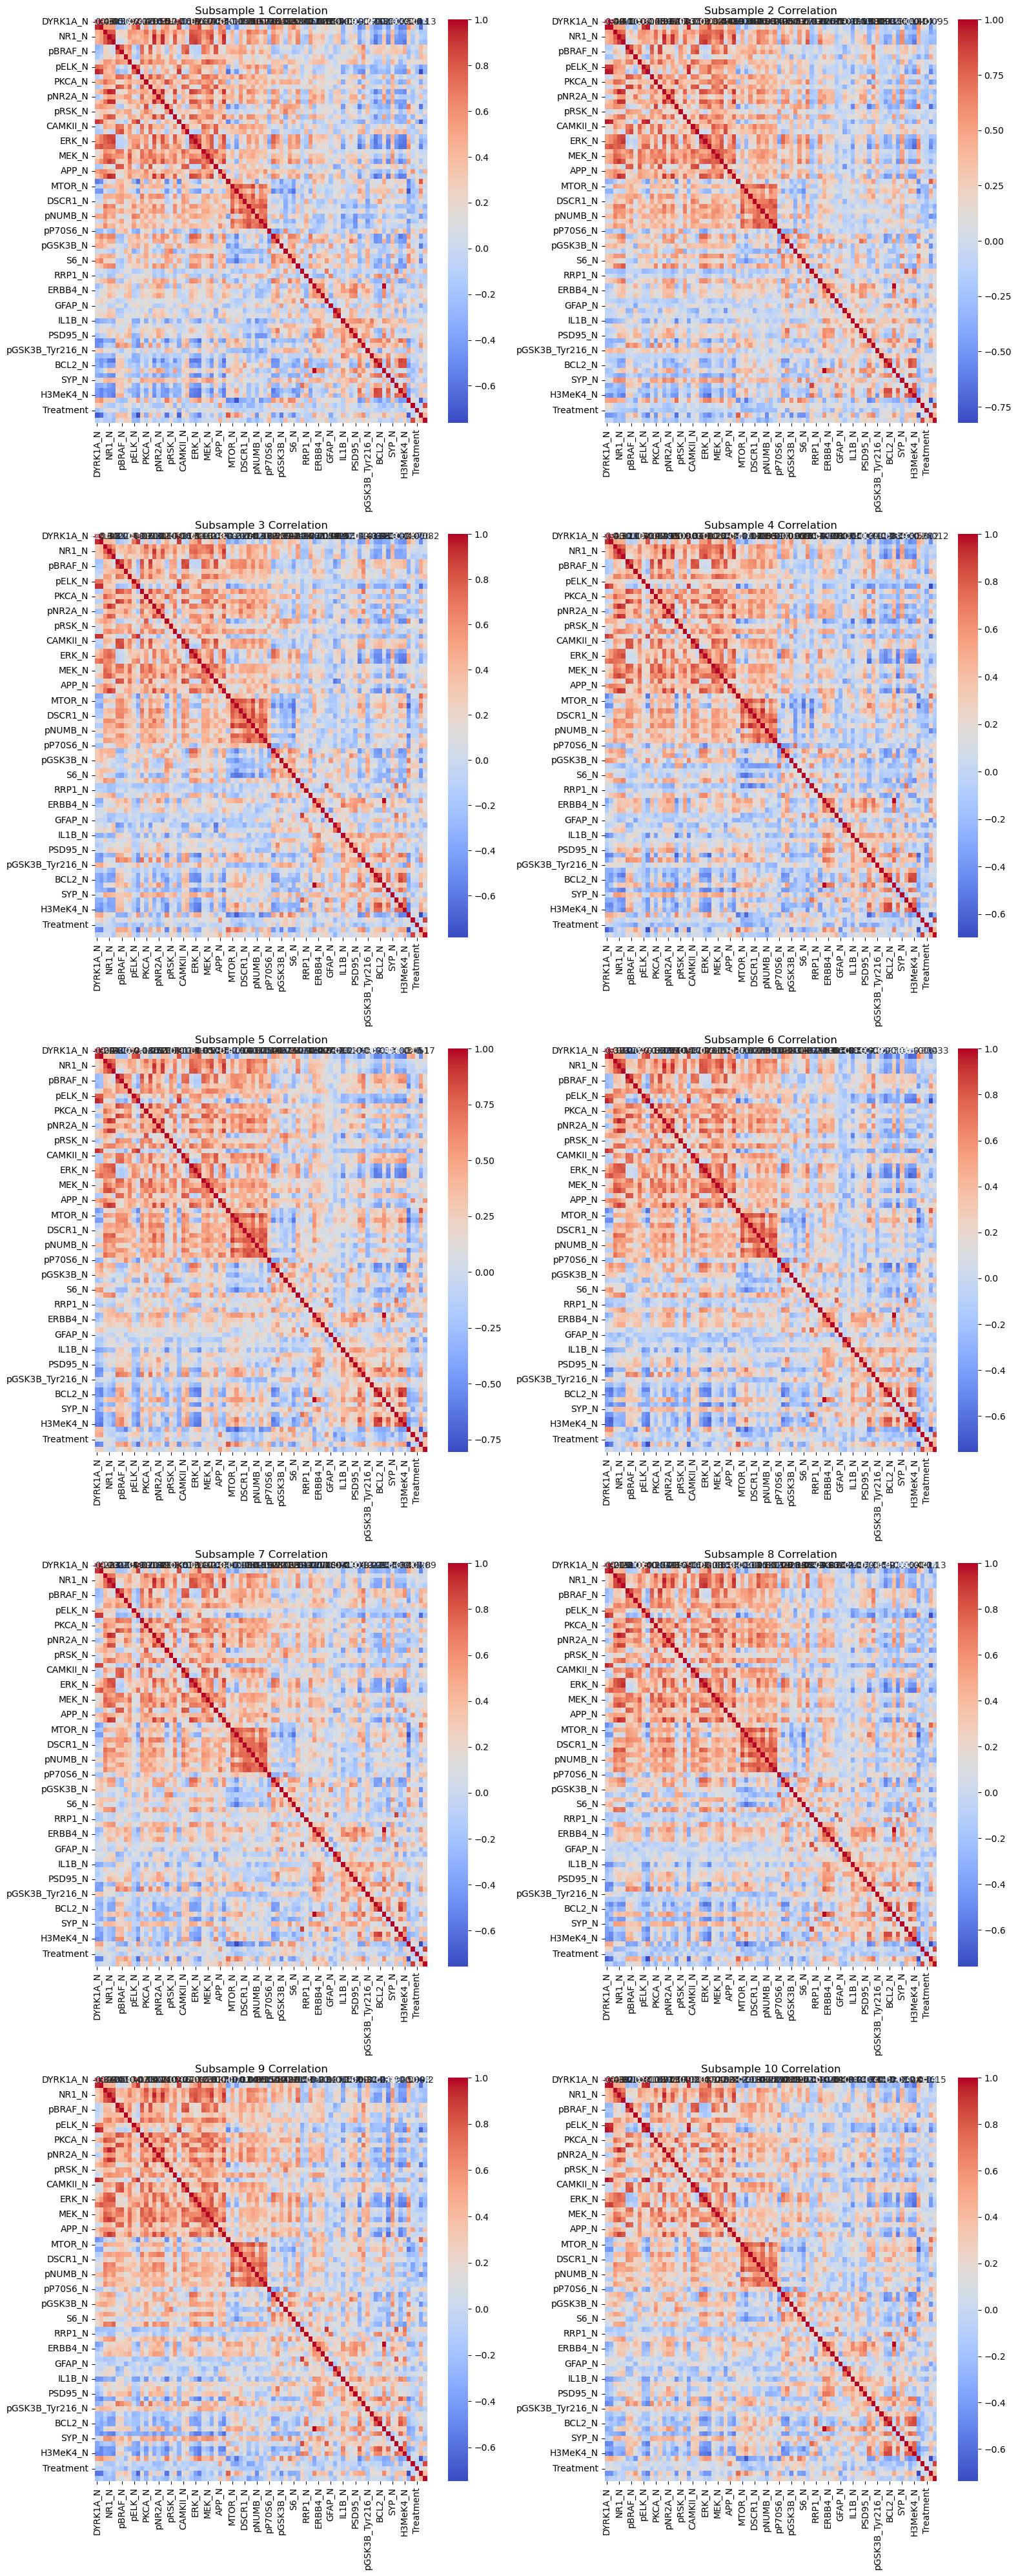

In [20]:
# Define the layout: 5 rows, 2 columns
fig, axes = plt.subplots(5, 2, figsize=(16, 40))  # Increase figsize as needed
axes = axes.ravel()

for i in range(10):
    subsample = df.sample(n=100, random_state=i)  # Taking a subsample of 100 instances
    corr_matrix = subsample.corr()
    sns.heatmap(corr_matrix, ax=axes[i], cmap='coolwarm', annot=True)
    axes[i].set_title(f'Subsample {i+1} Correlation')

# Hide unused axes if there are any
for j in range(i+1, 10):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


$\textbf{TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced }$<br>
$\textbf{TASK(Regression): If your problem is a regression problem visually the distribution of your target variabe}$

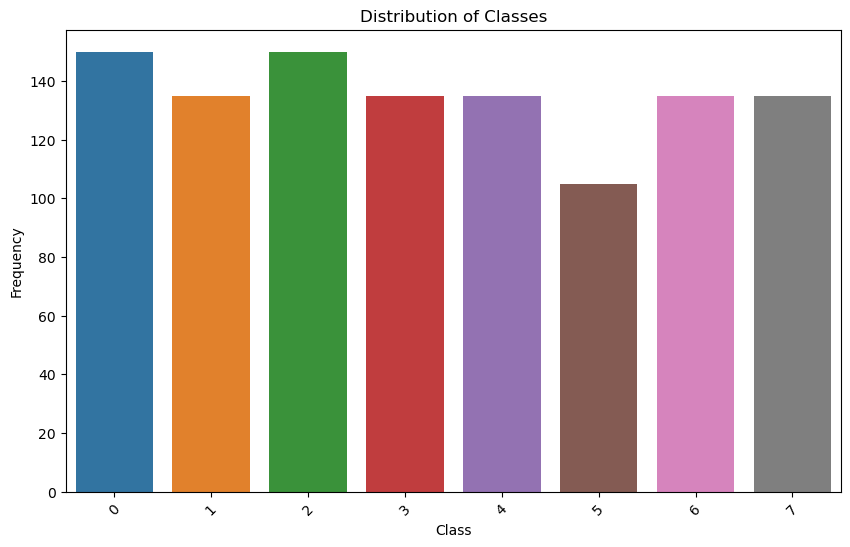

In [21]:
#classification
class_counts = df['Class'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates the class labels for better readability
plt.show()


$\textbf{TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable}$

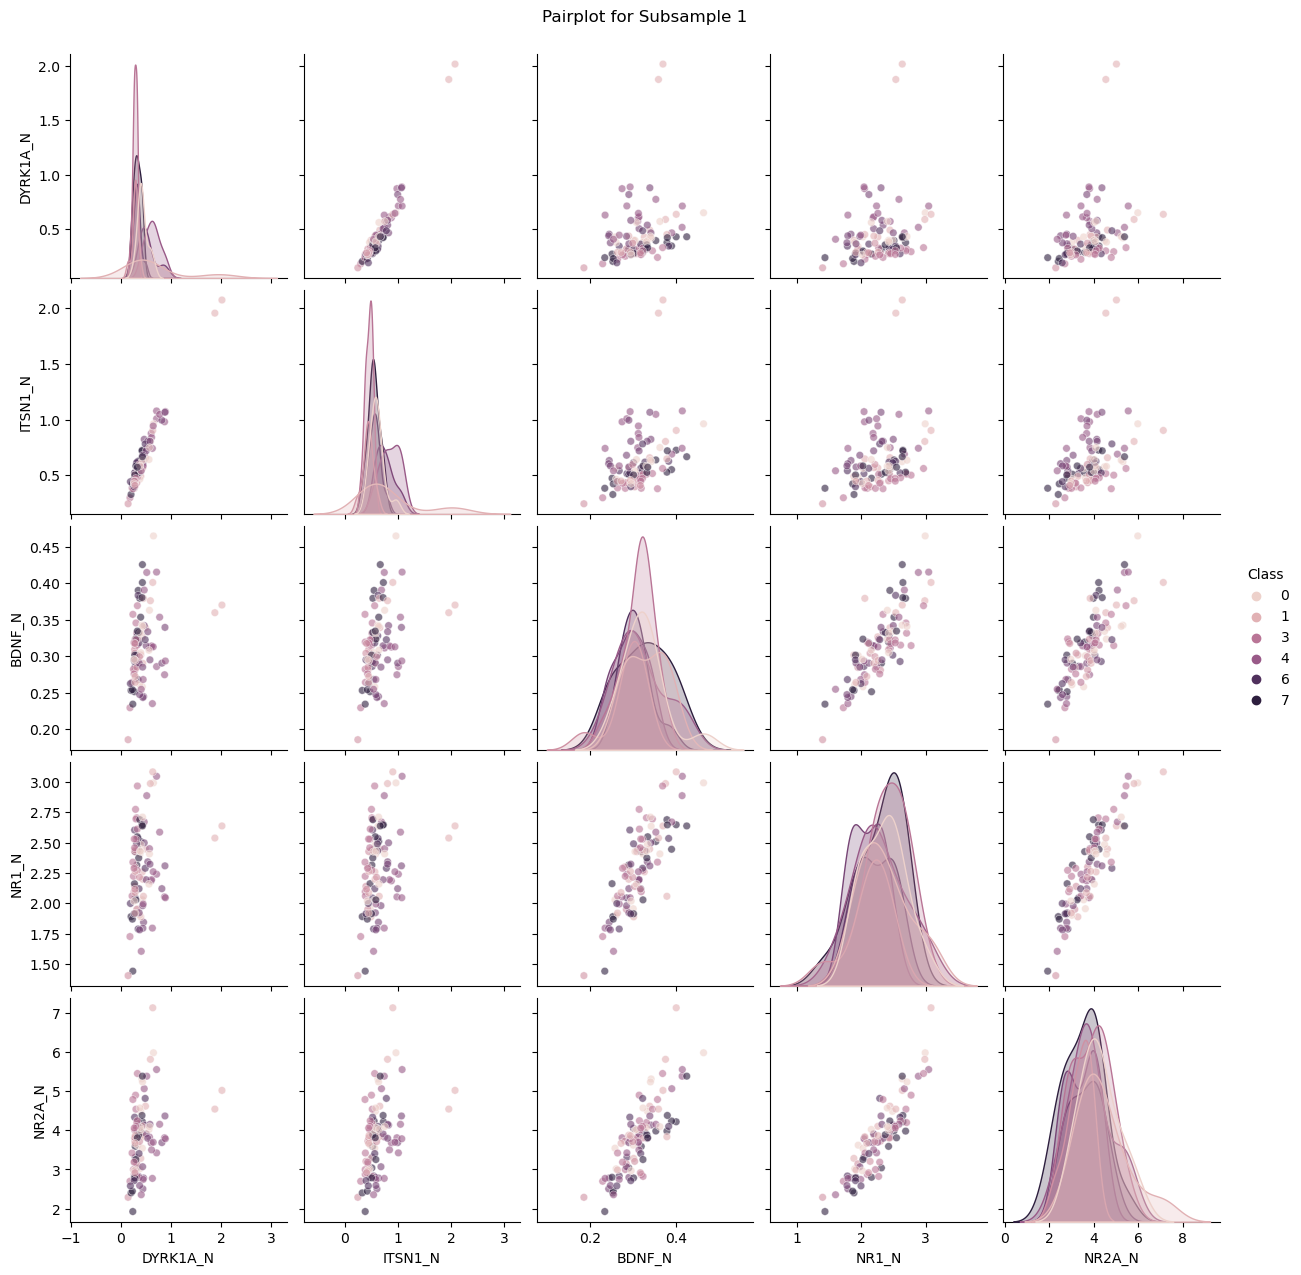

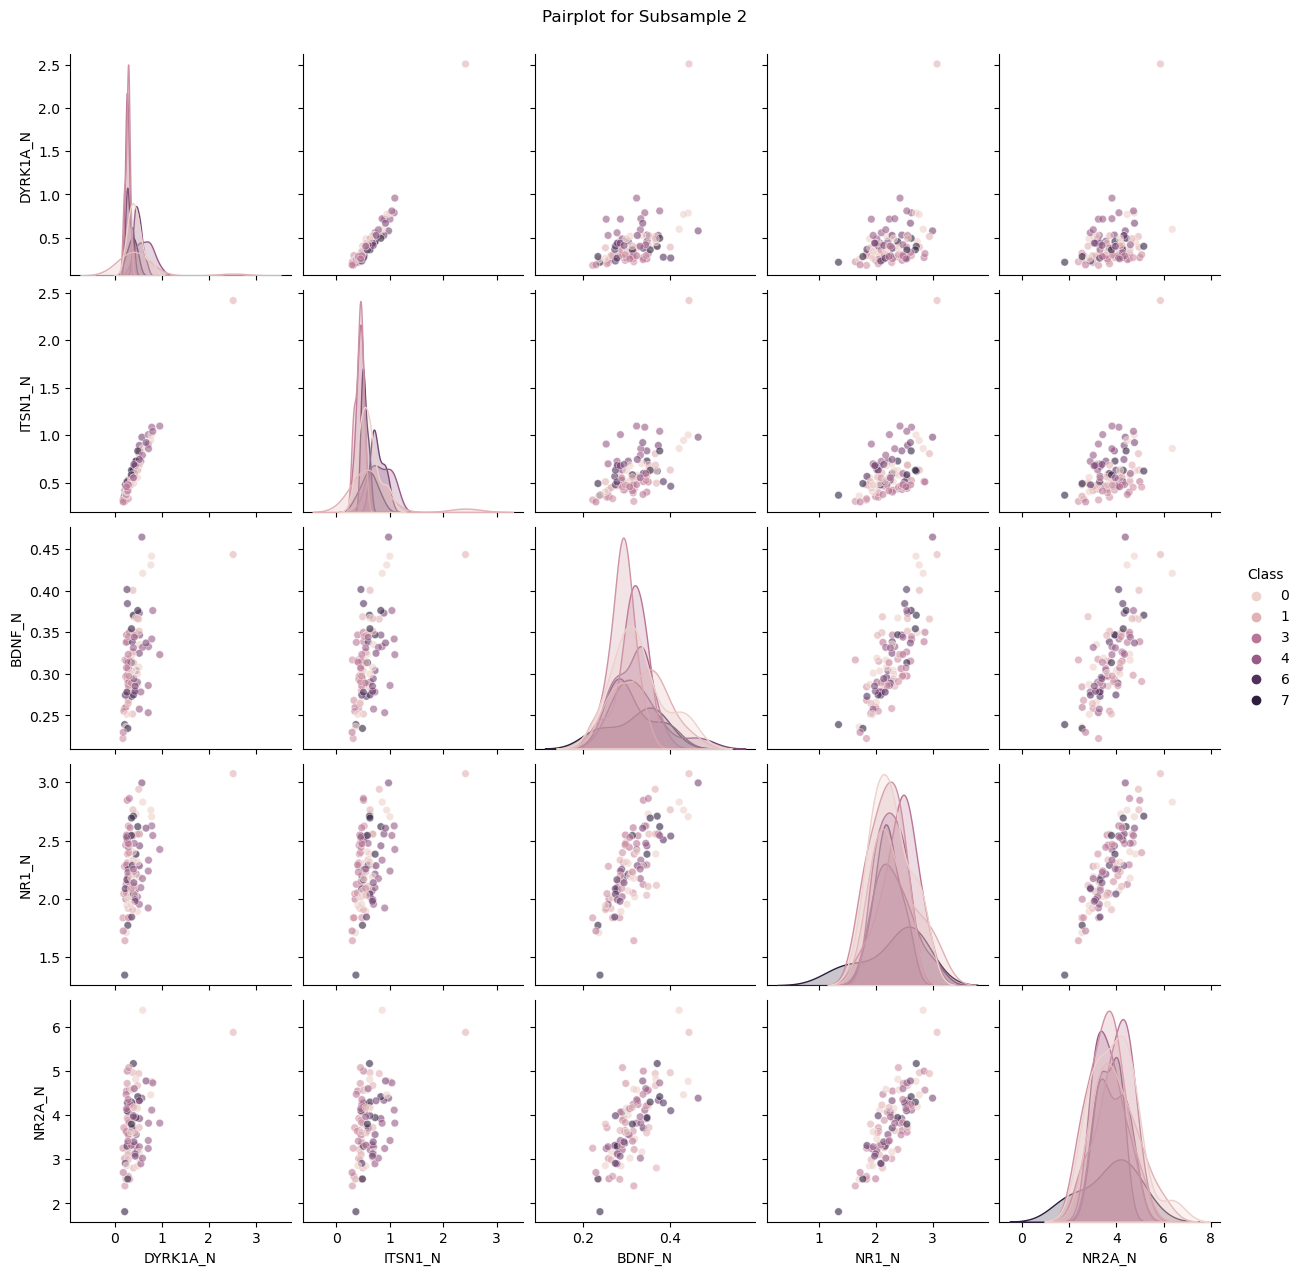

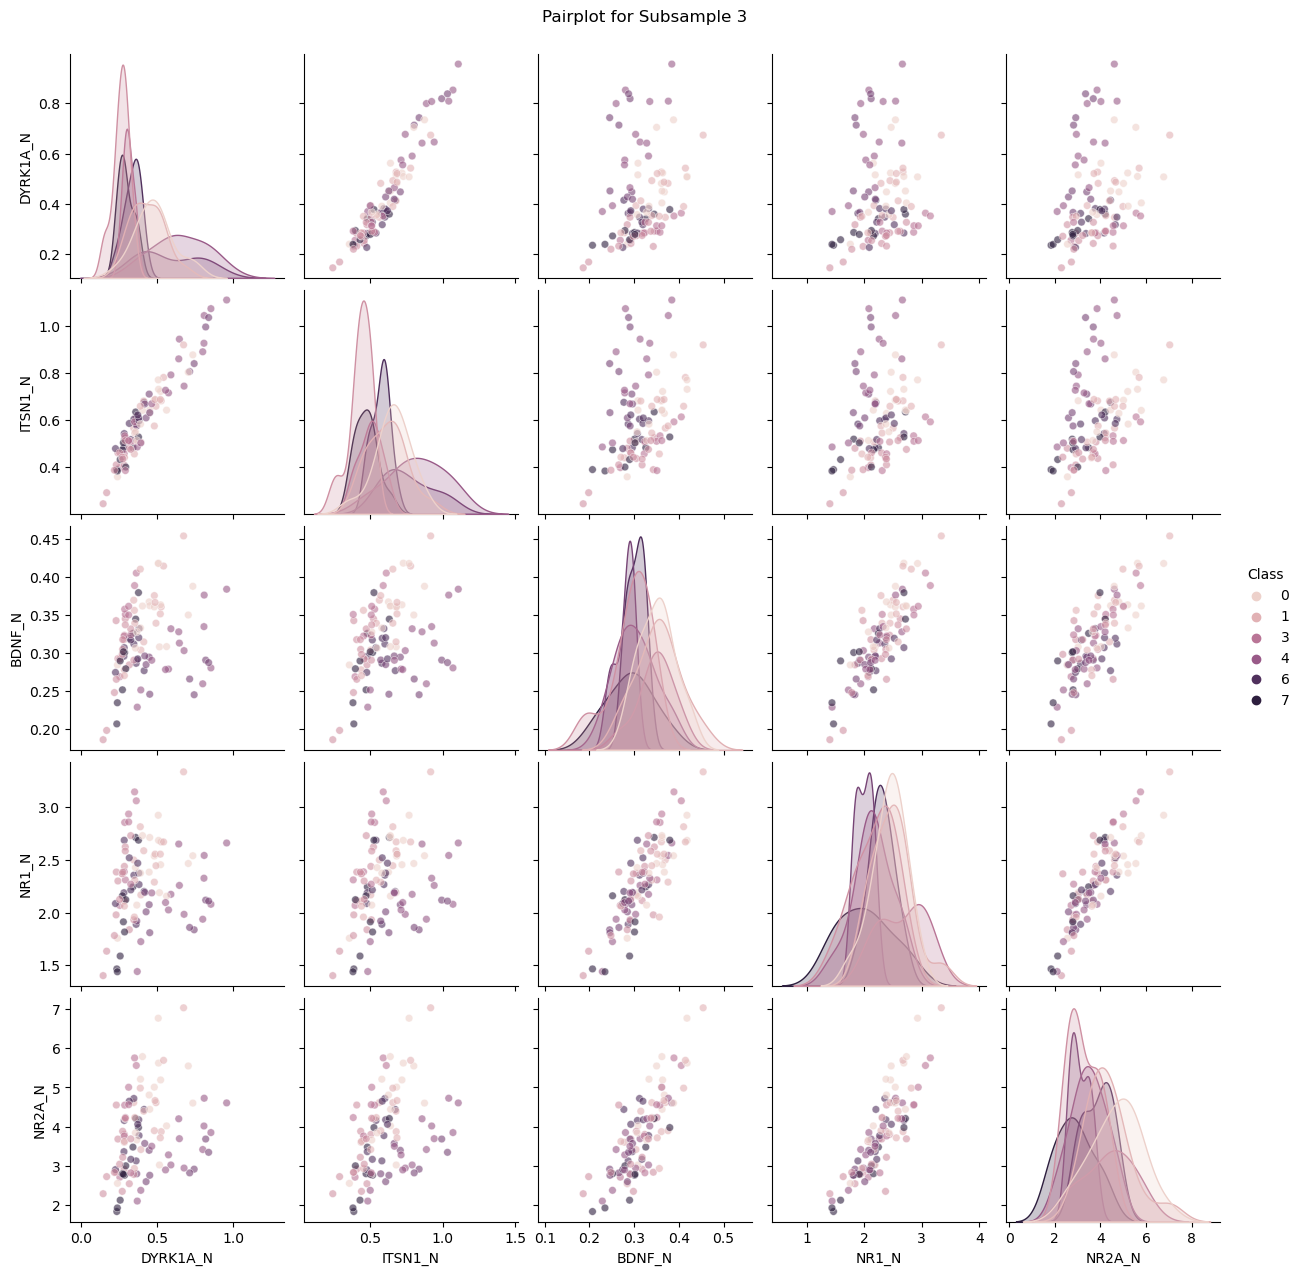

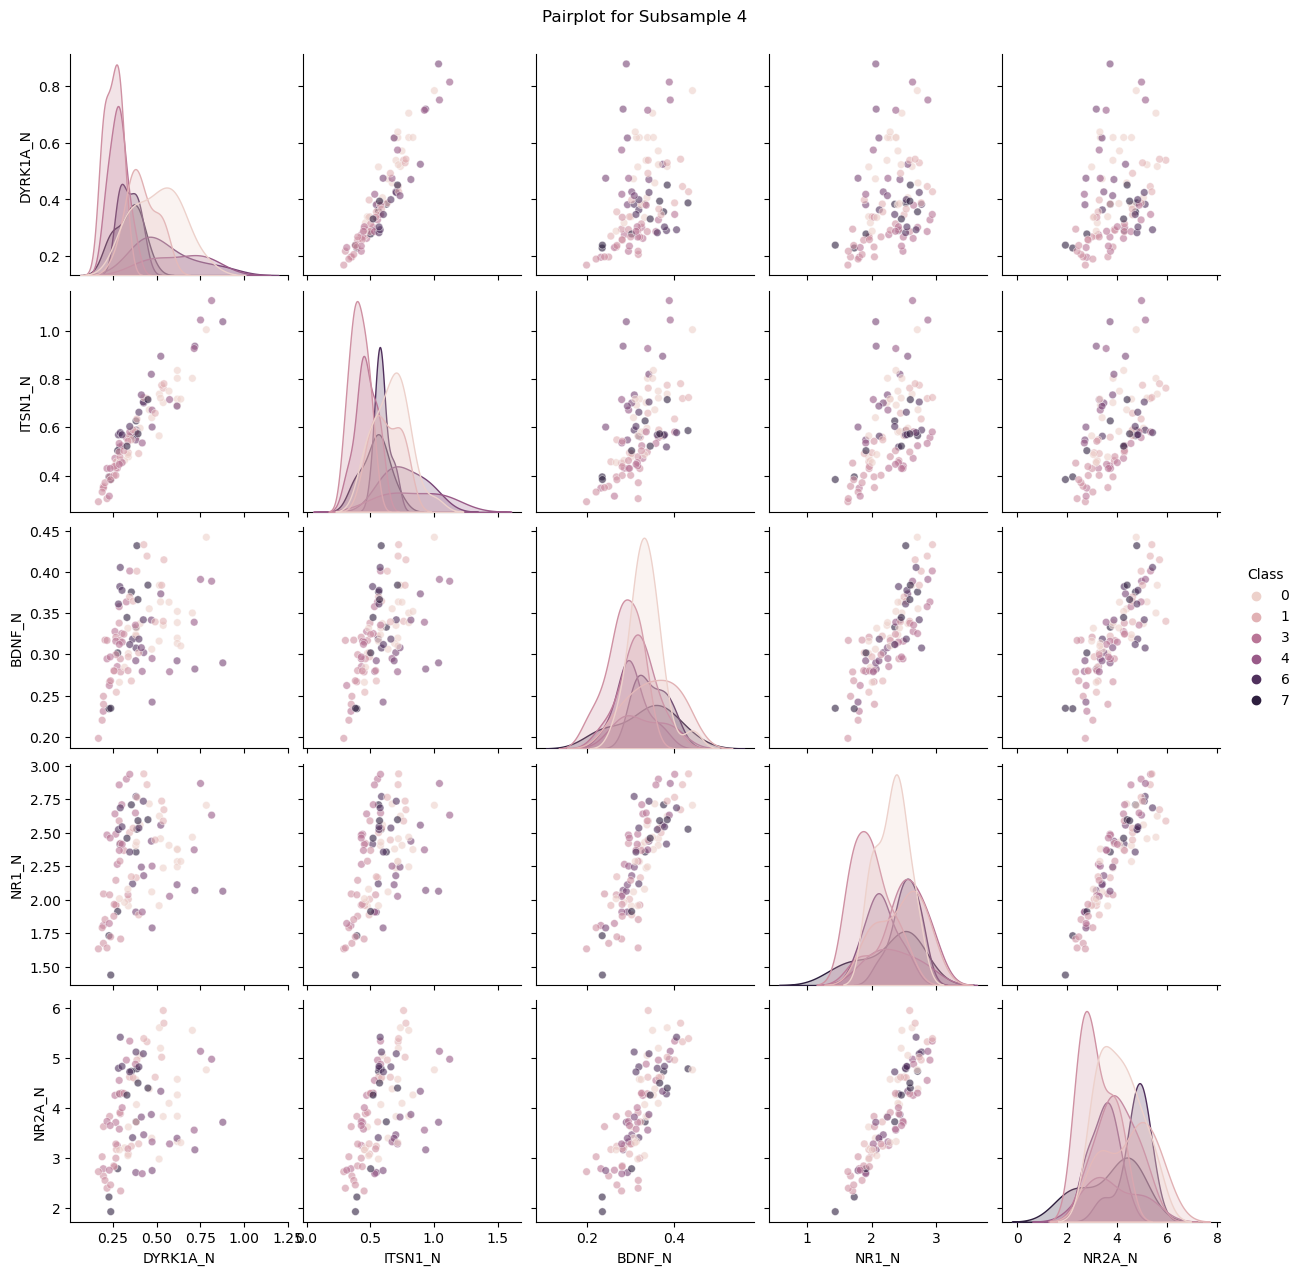

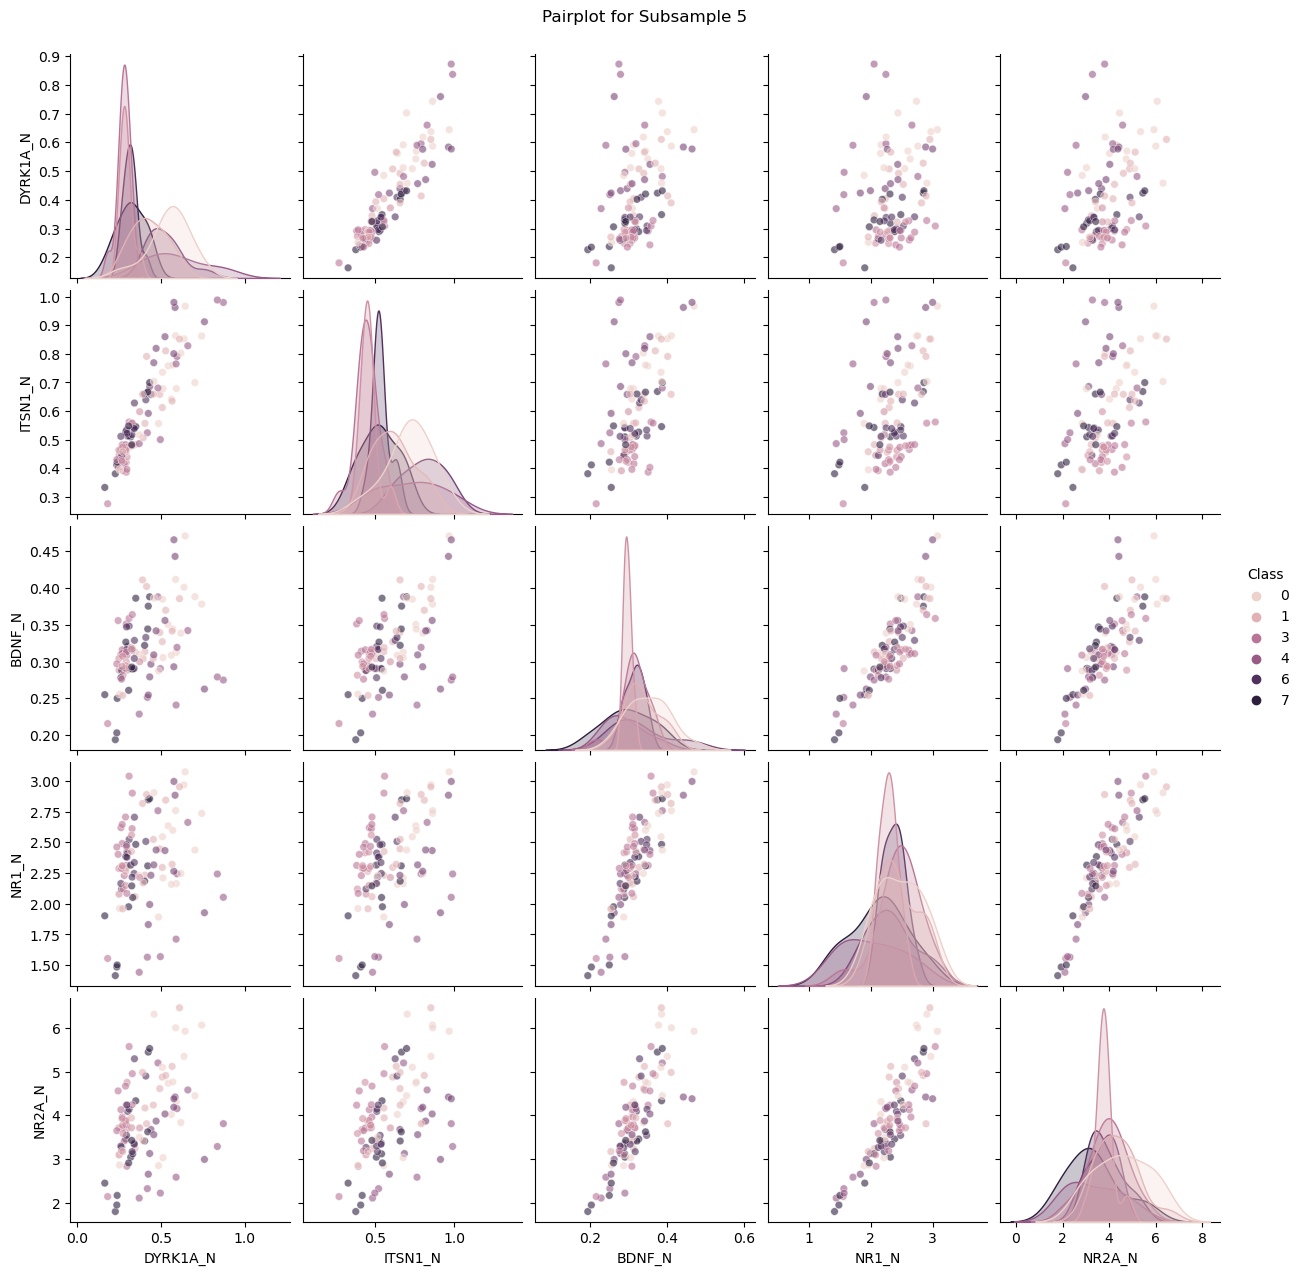

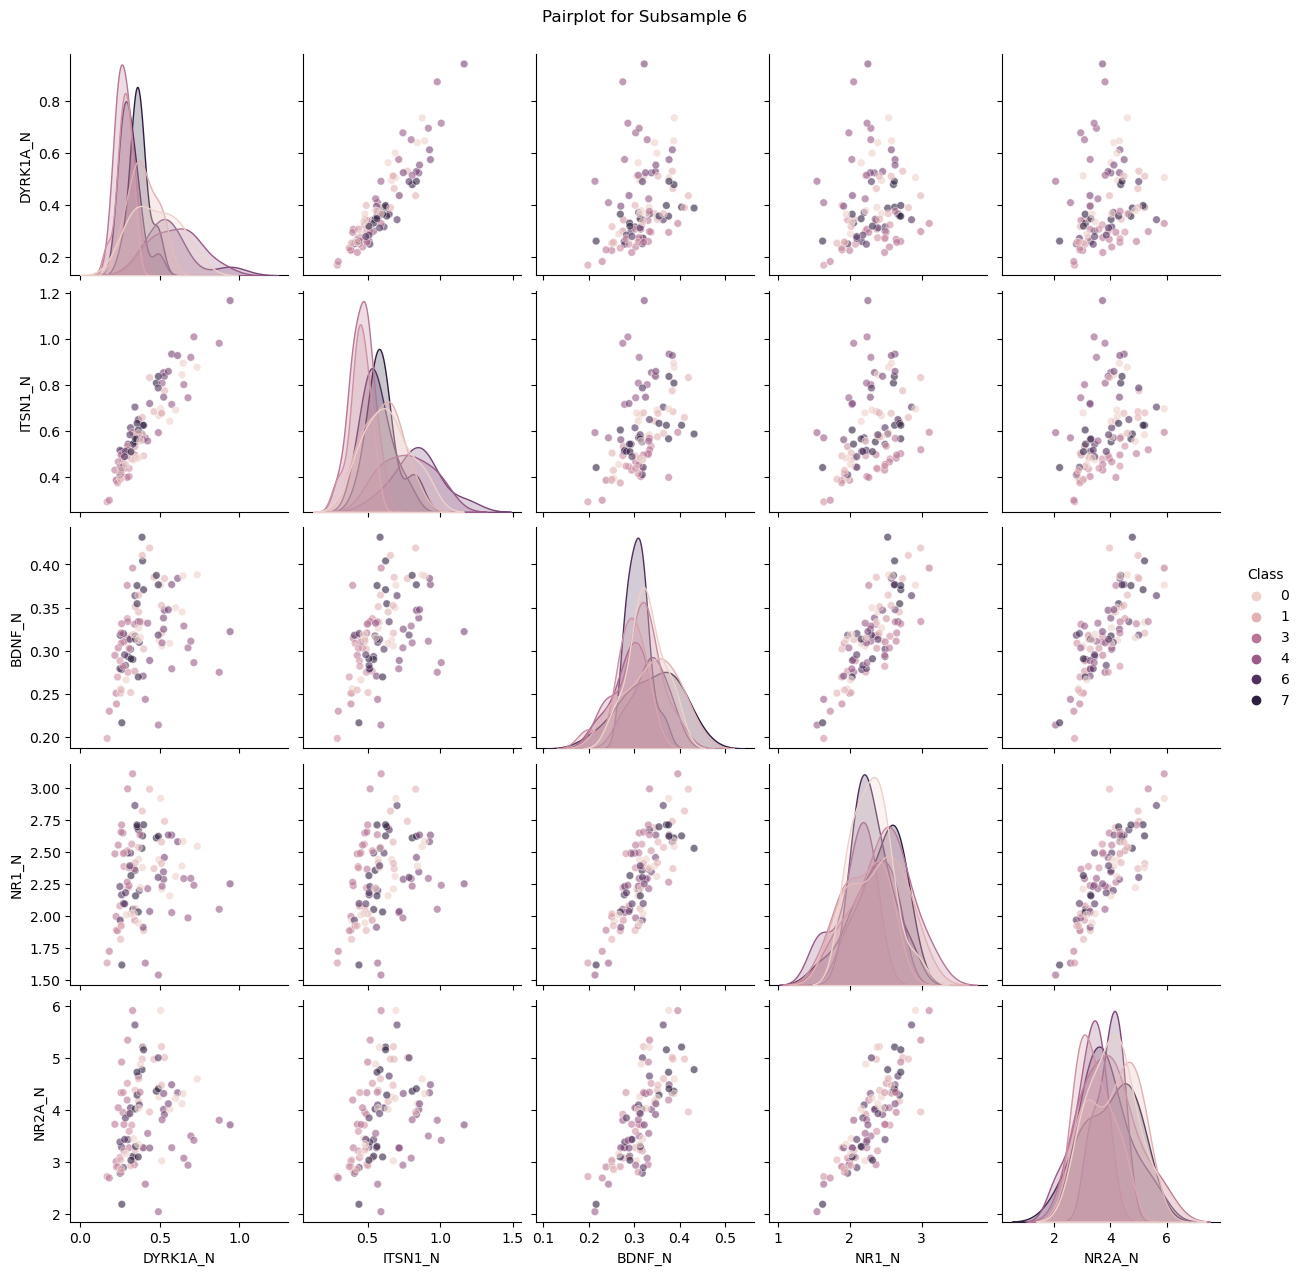

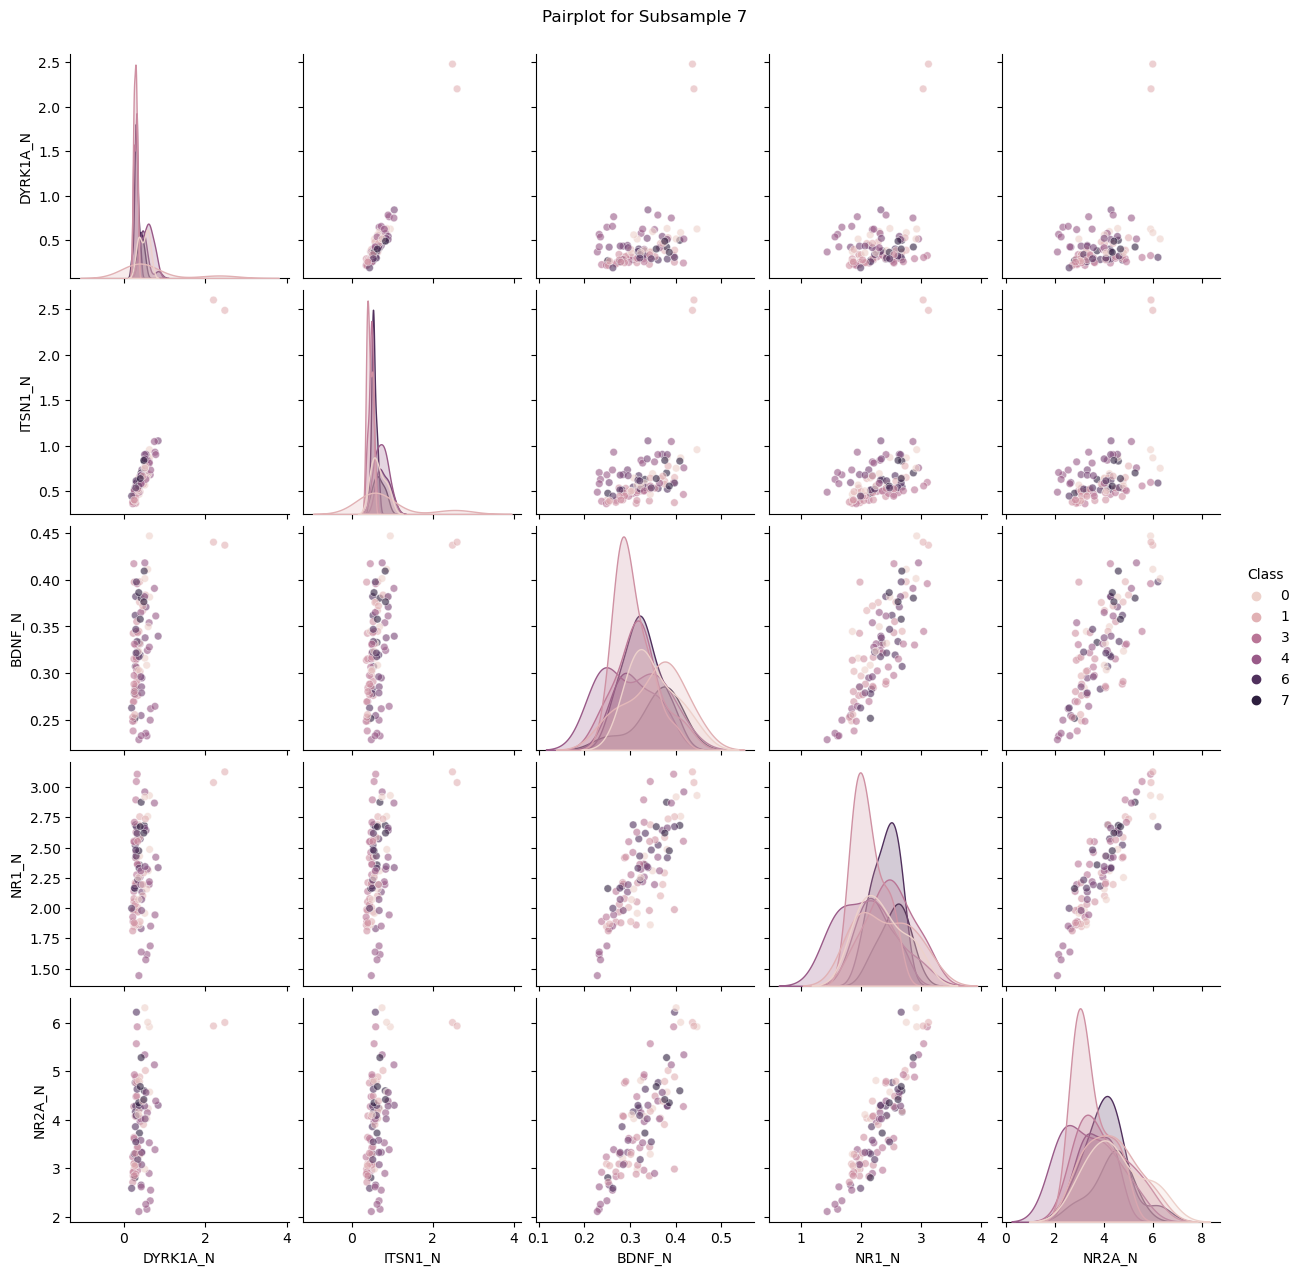

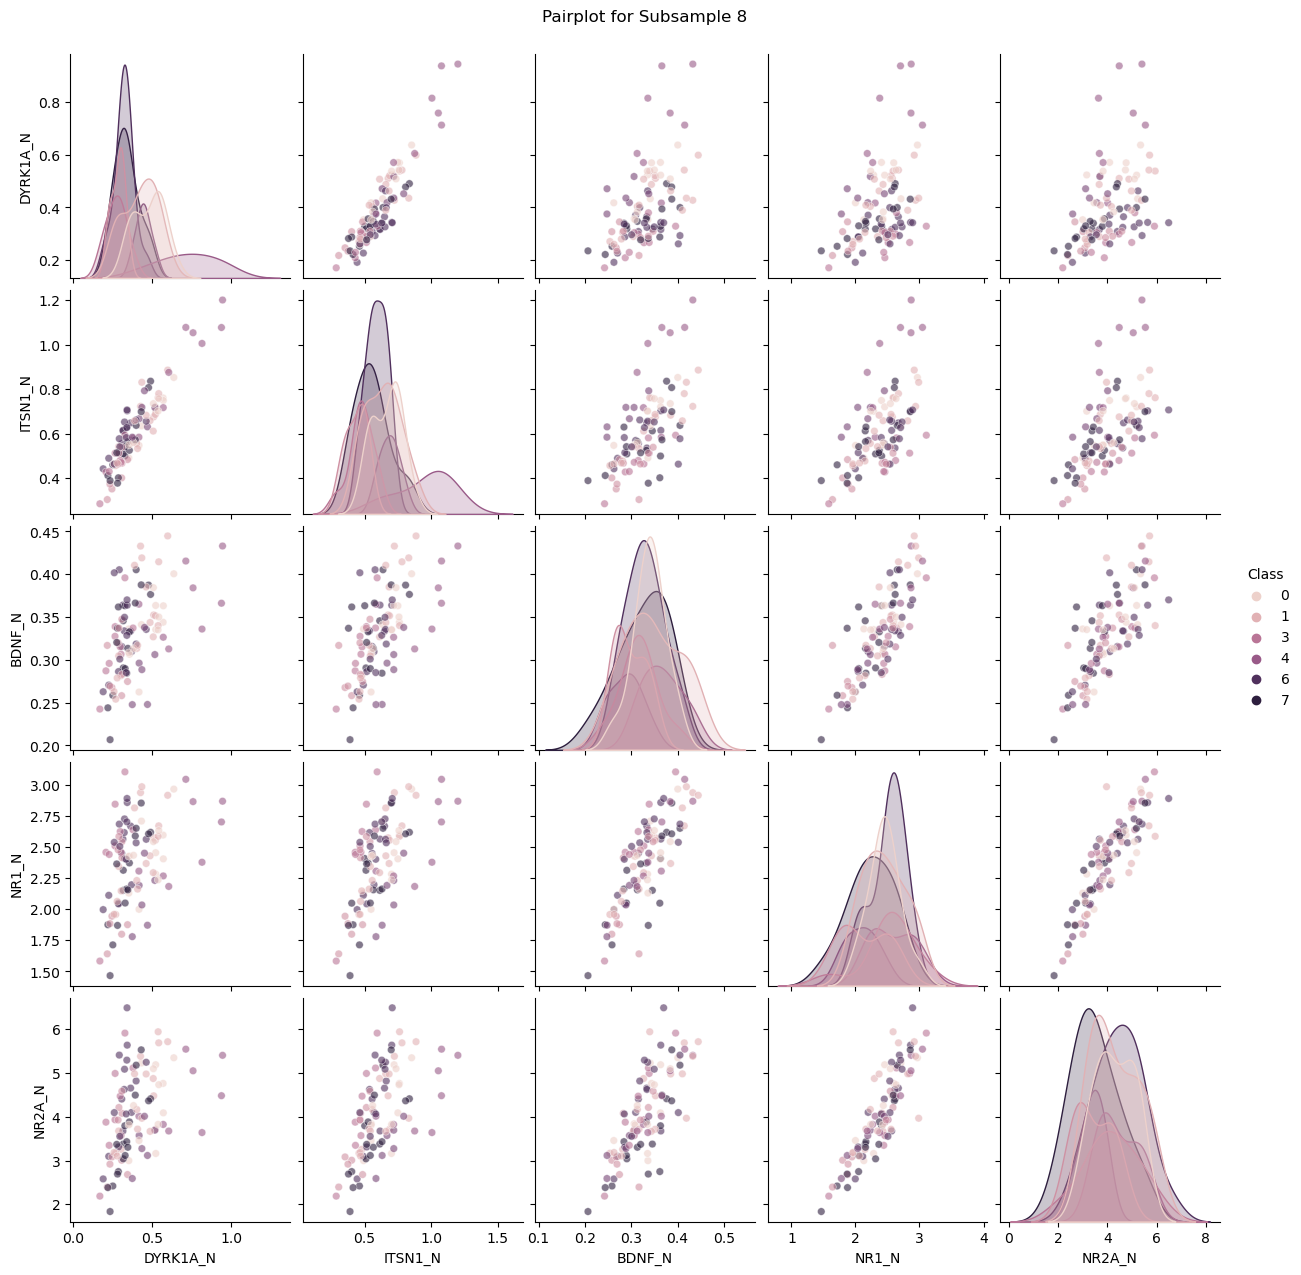

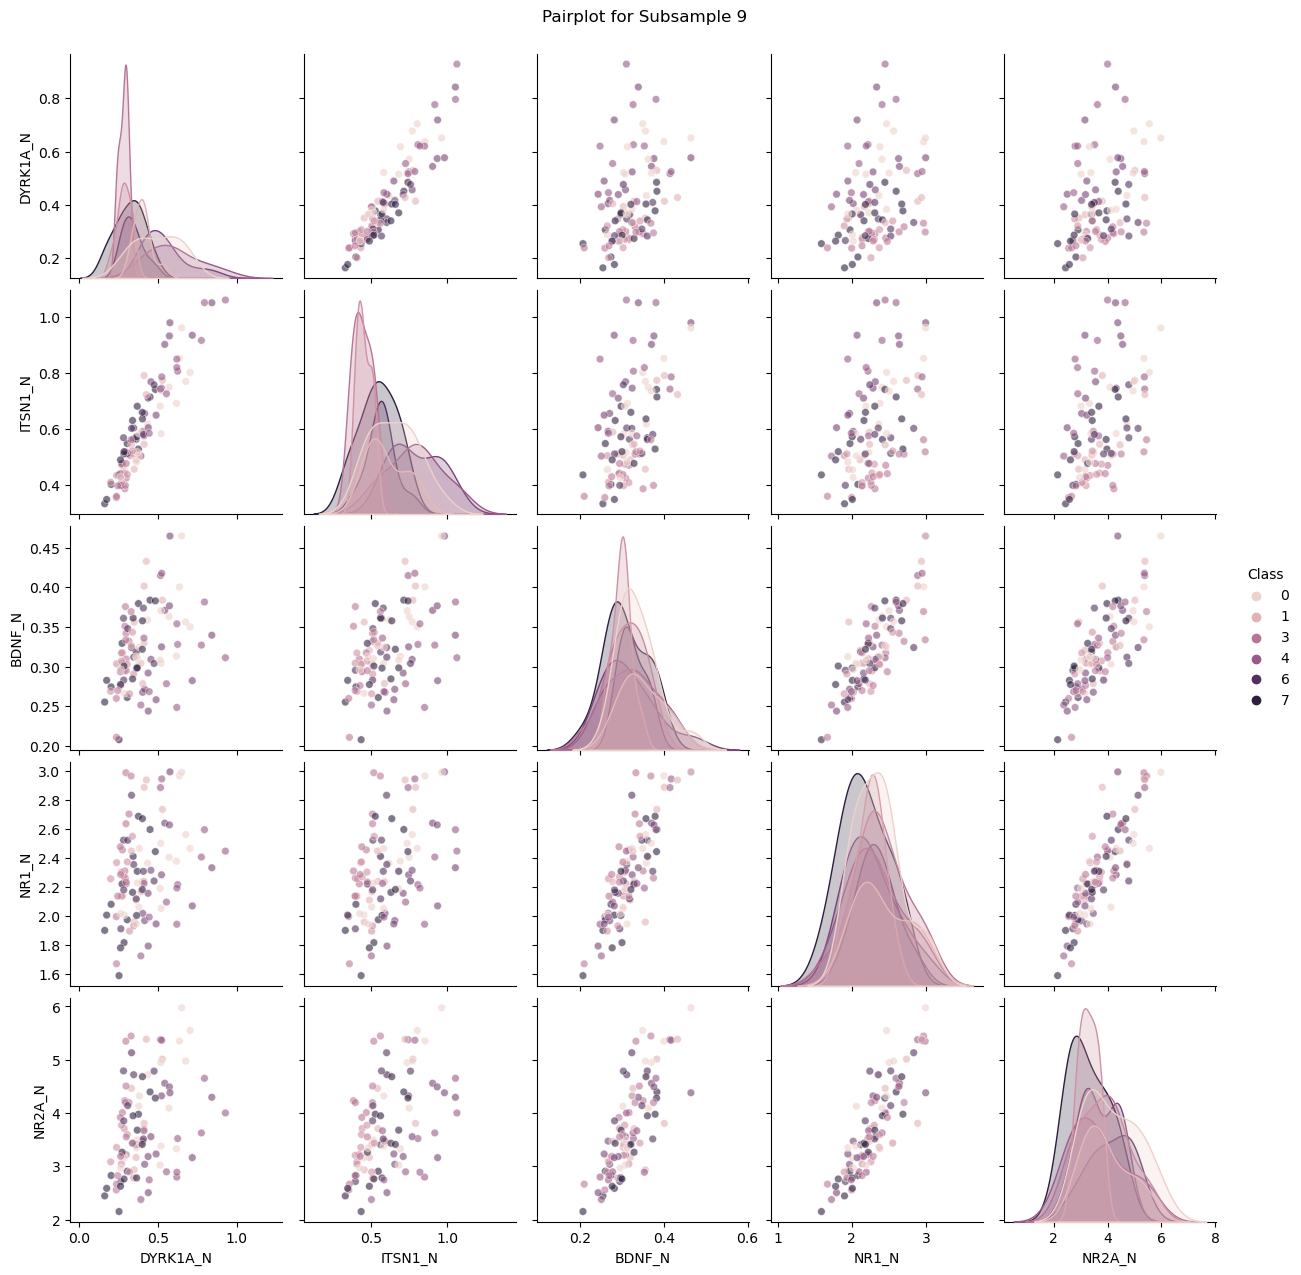

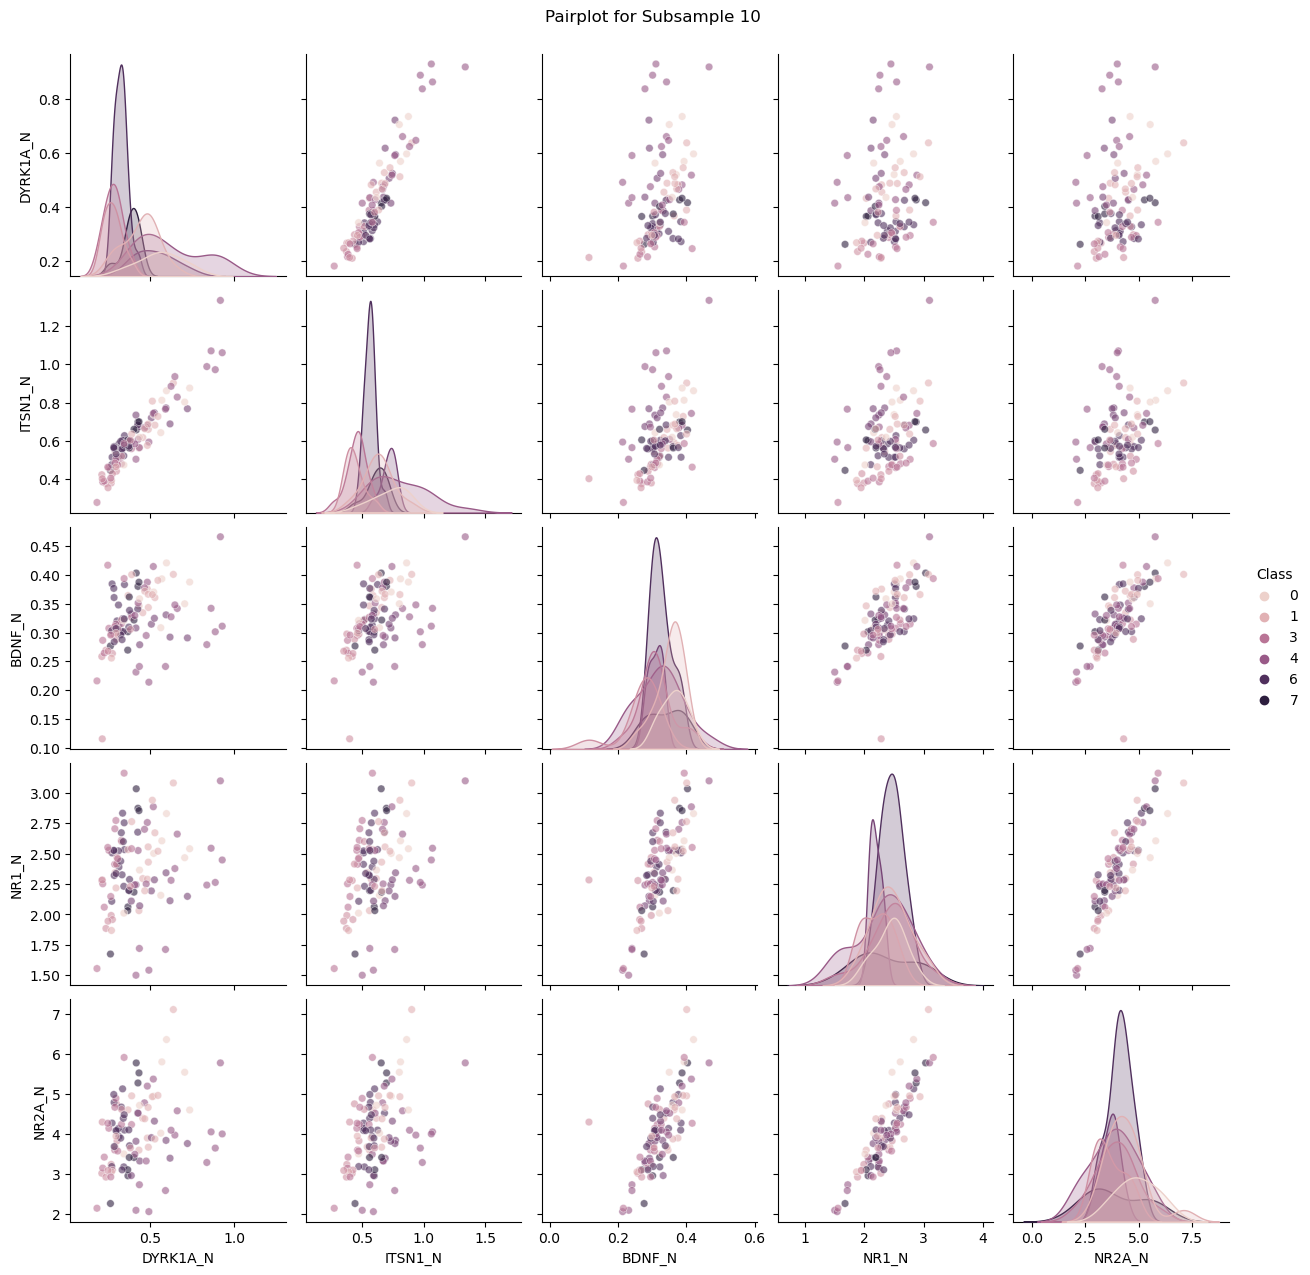

In [25]:
# Define the number of subsamples and the size of each subsample
num_samples = 10
sample_size = 100

# Select a subset of columns, for example, important features and the target class
selected_columns = df.columns[:5].tolist() + ['Class']

# Randomly generate subsample indices to ensure reproducibility
np.random.seed(42)
subsample_indices = [np.random.choice(df.index, size=sample_size, replace=False) for _ in range(num_samples)]

# Iterate through the subsample indices to create pairplots for selected columns
for i, indices in enumerate(subsample_indices):
    subsample = df.iloc[indices][selected_columns]
    g = sns.pairplot(subsample, hue='Class', plot_kws={'alpha': 0.6, 's': 30})
    g.fig.suptitle(f'Pairplot for Subsample {i + 1}', y=1.02)  # Adjust the title and slightly lift it
    plt.show()


$\textbf{TASK: Create a clustermap with seaborn to explore the relationships between variables.}$

In [27]:
# Check for NaN values
print(df.isna().sum())

# Check for infinite values
print(np.isinf(df).sum())


DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
NR2A_N       3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
Class        0
Length: 81, dtype: int64
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
Class        0
Length: 81, dtype: int64


In [28]:
df.fillna(df.mean(), inplace=True)

for column in df.columns:
    max_val = np.max(df[column][np.isfinite(df[column])])
    df[column].replace([np.inf, -np.inf], max_val, inplace=True)


C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\3177796189.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace([np.inf, -np.inf], max_val, inplace=True)


C:\Users\Cait\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Cait\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


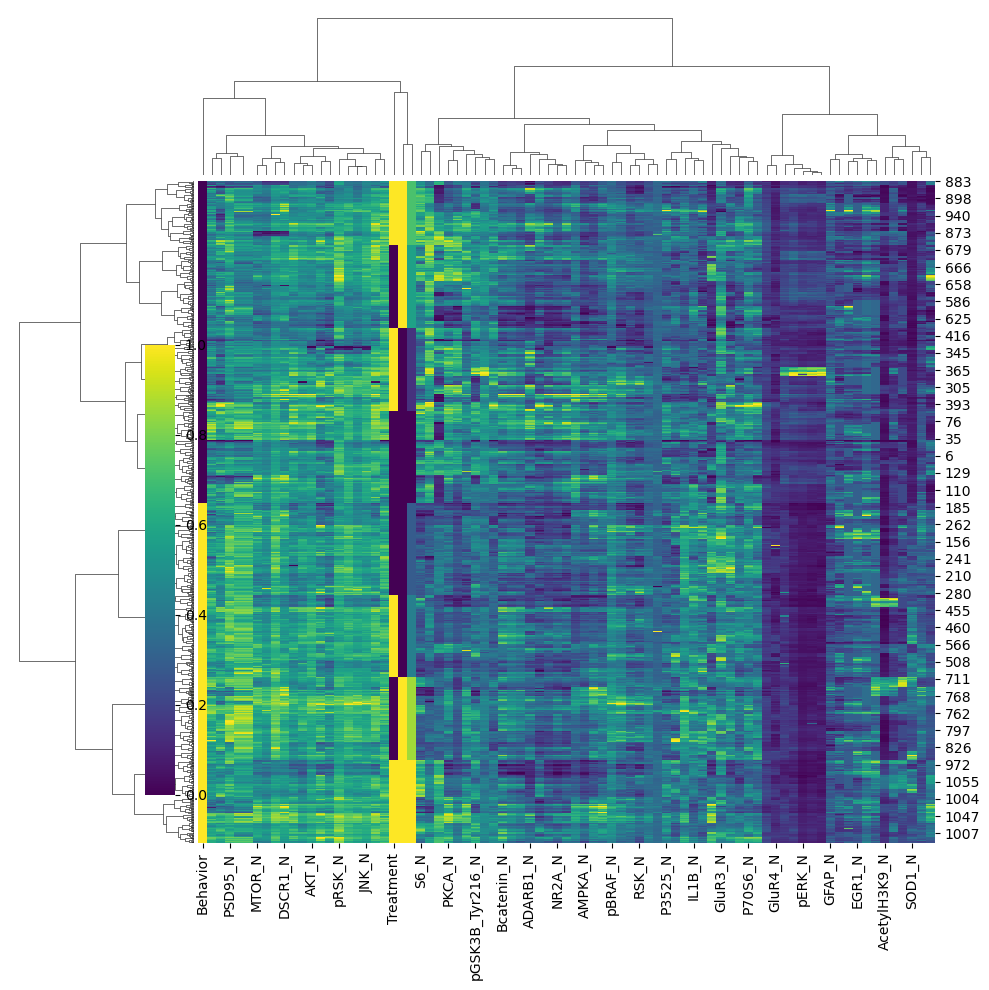

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Create the clustermap
g = sns.clustermap(df_scaled, method='ward', metric='euclidean', cmap='viridis',
                   standard_scale=1, figsize=(10, 10))

# Adjust the position of the colorbar if necessary
g.cax.set_position([.15, .2, .03, .45])

plt.show()


C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

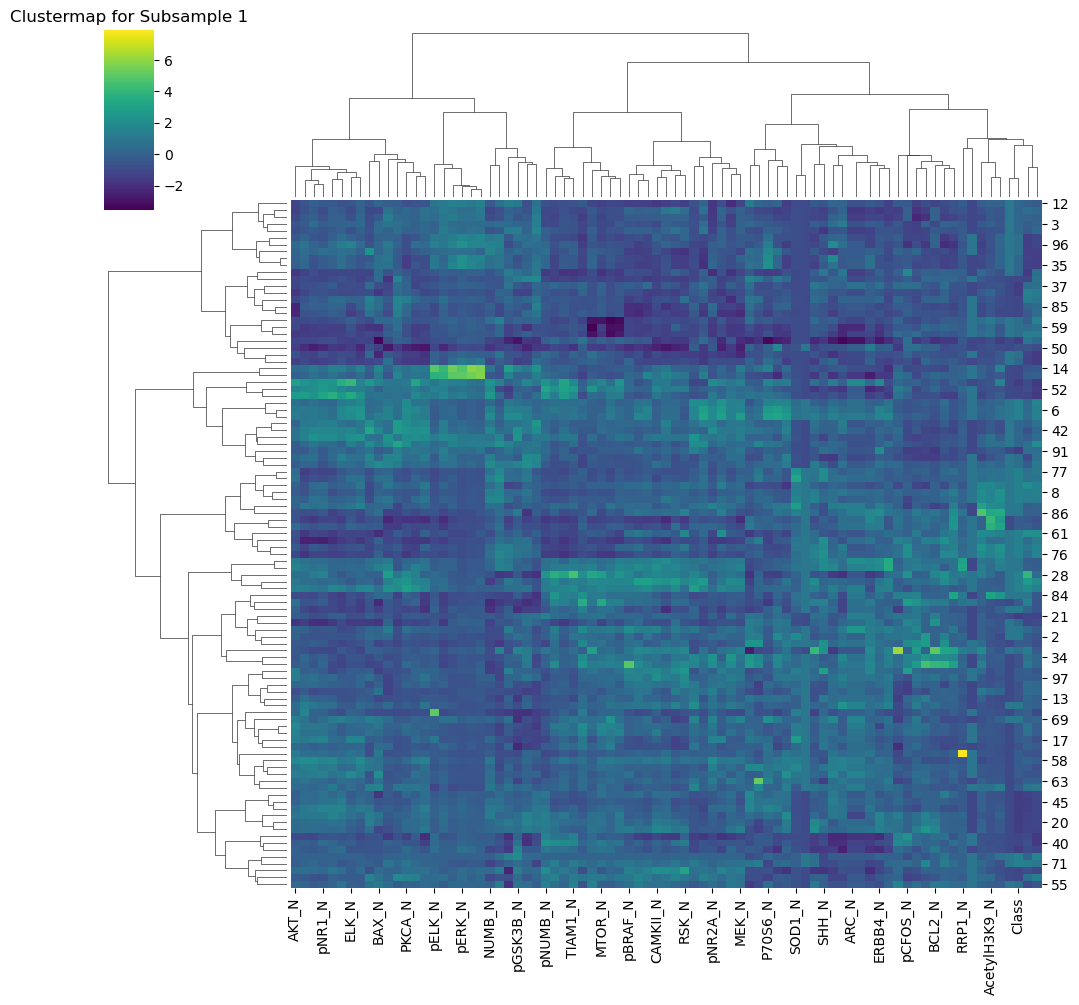

C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

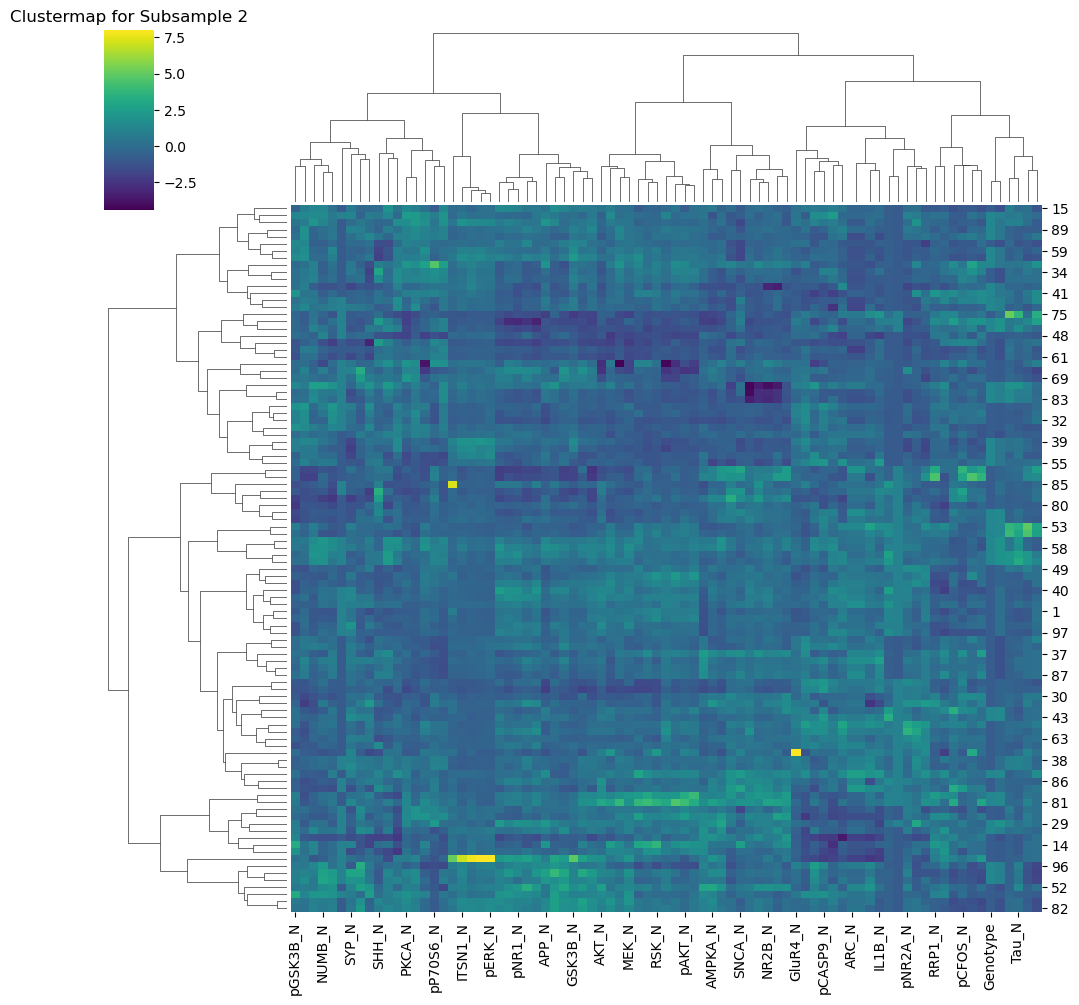

C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

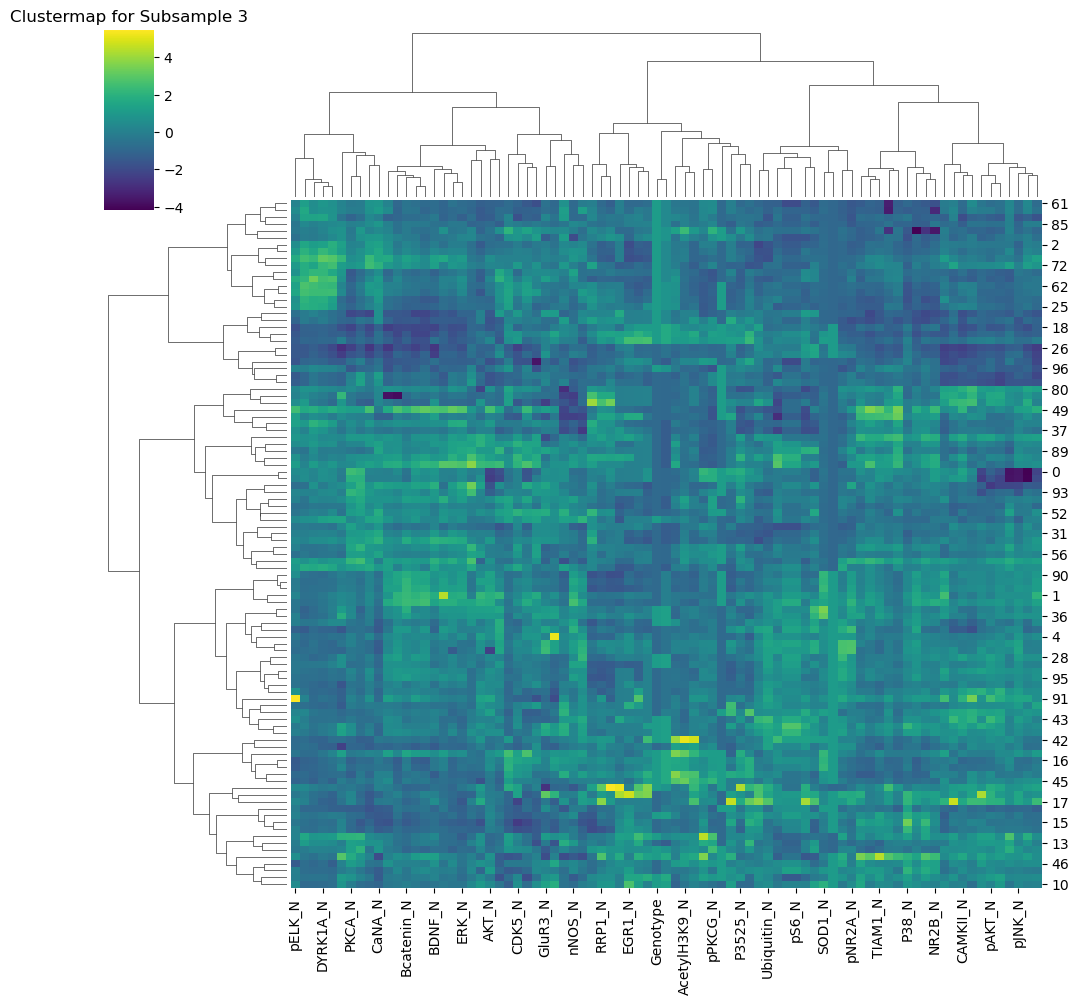

C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

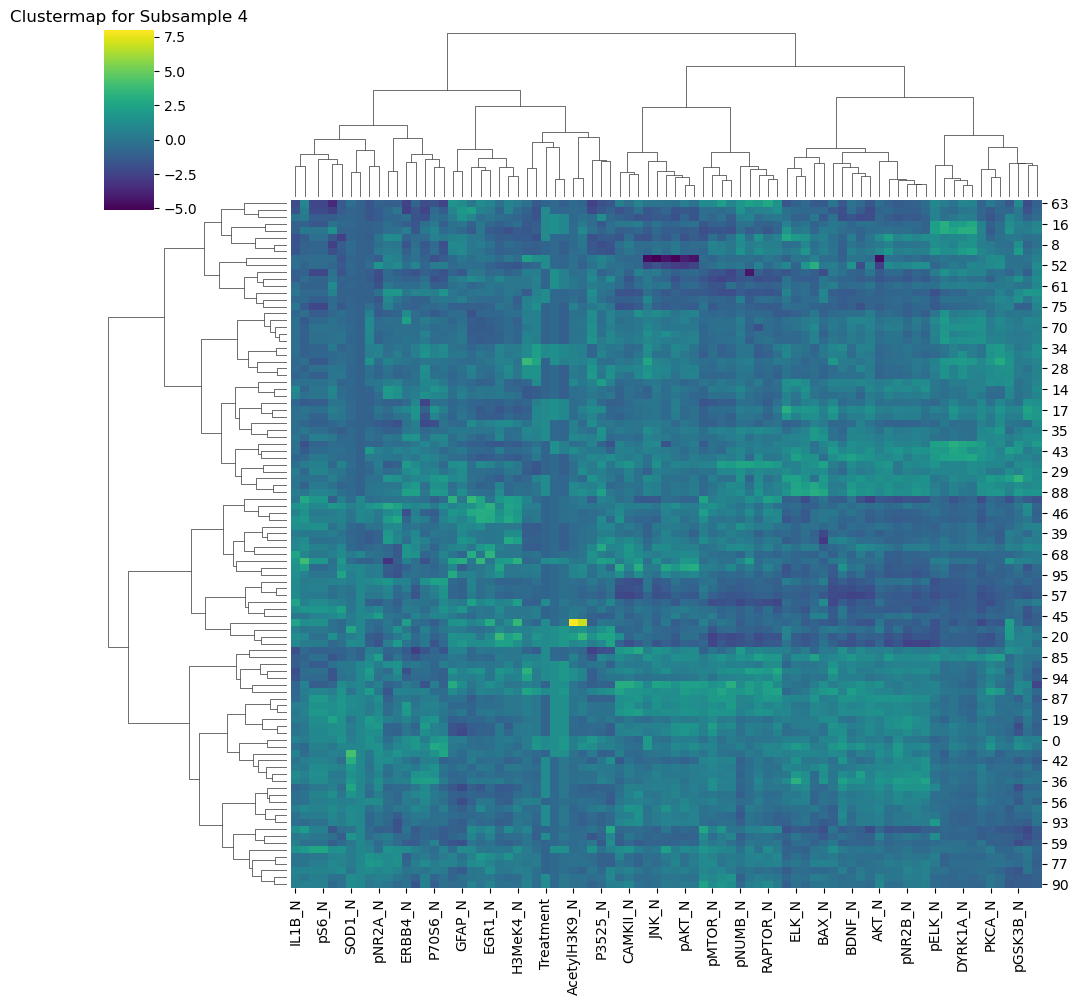

C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

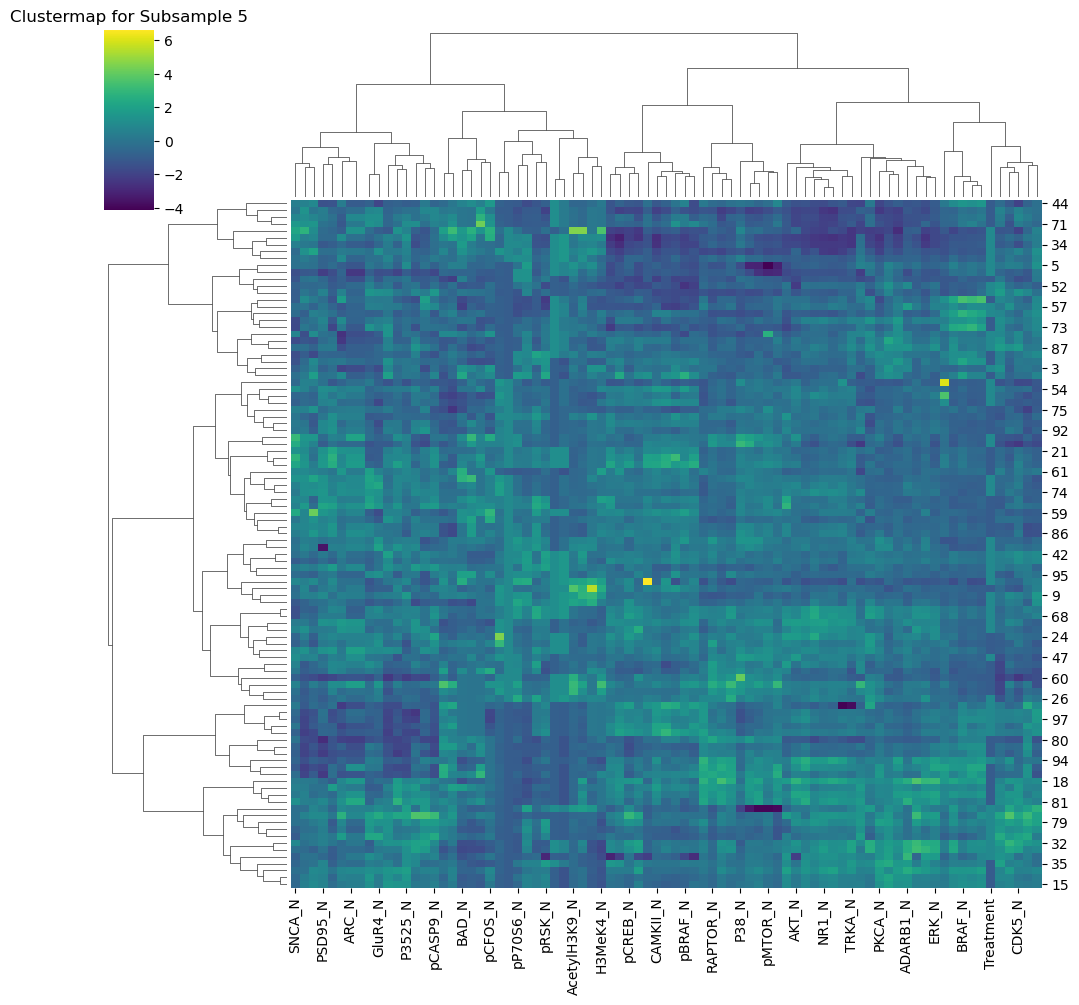

C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

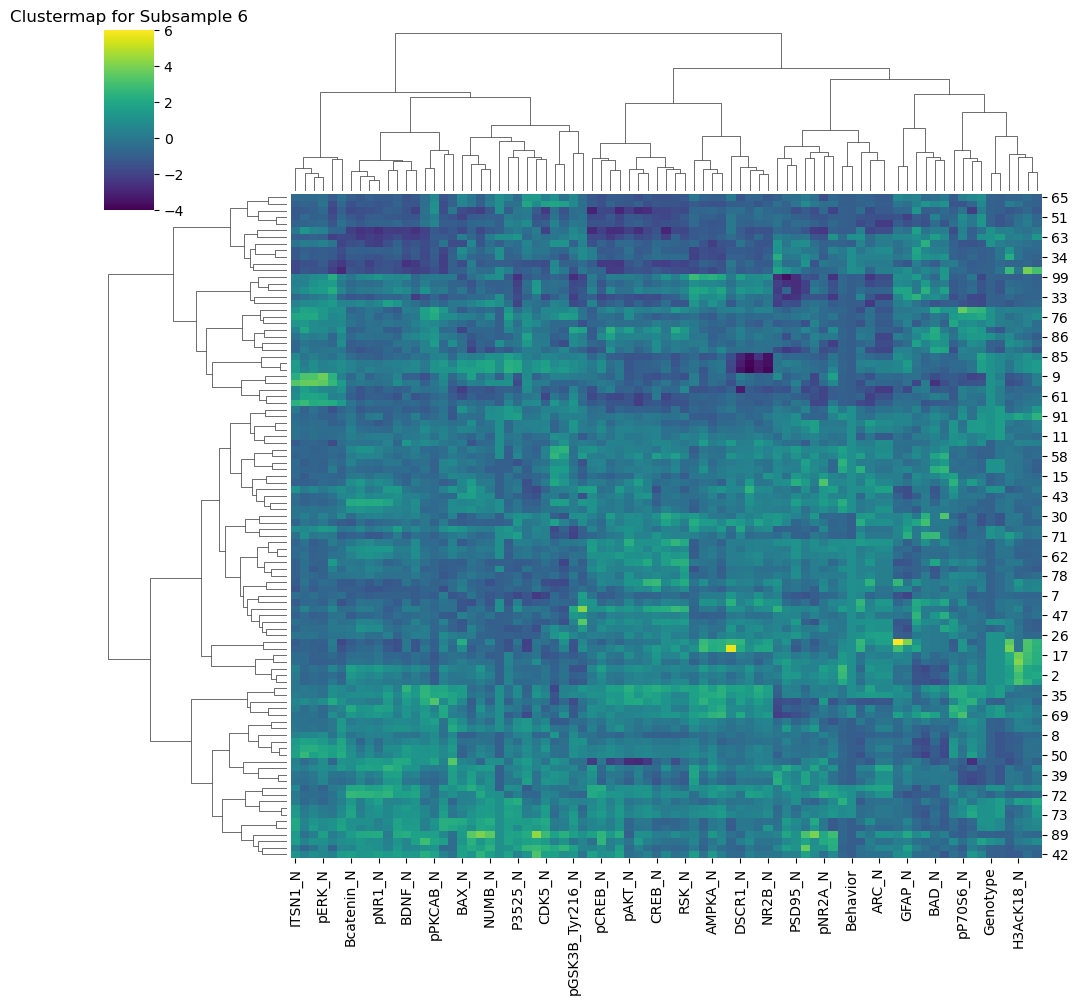

C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

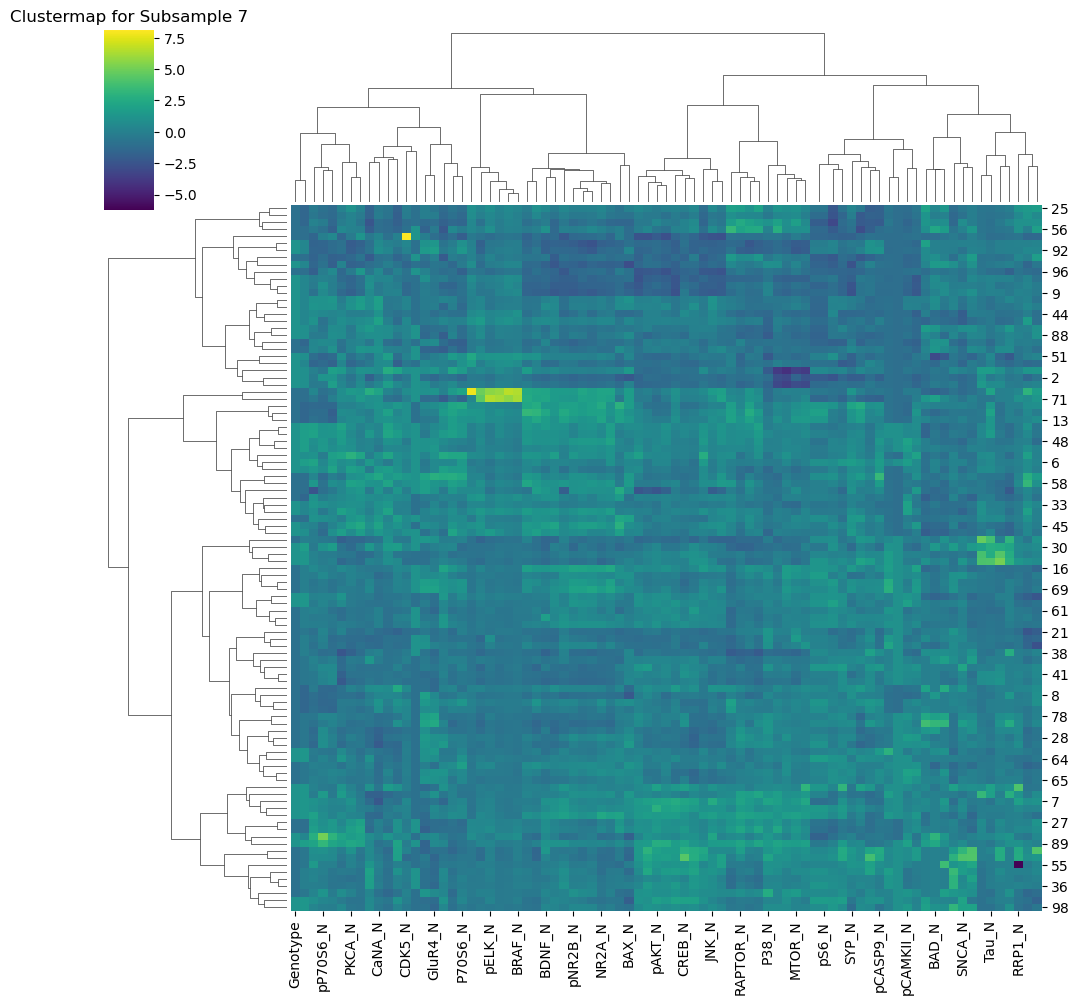

C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

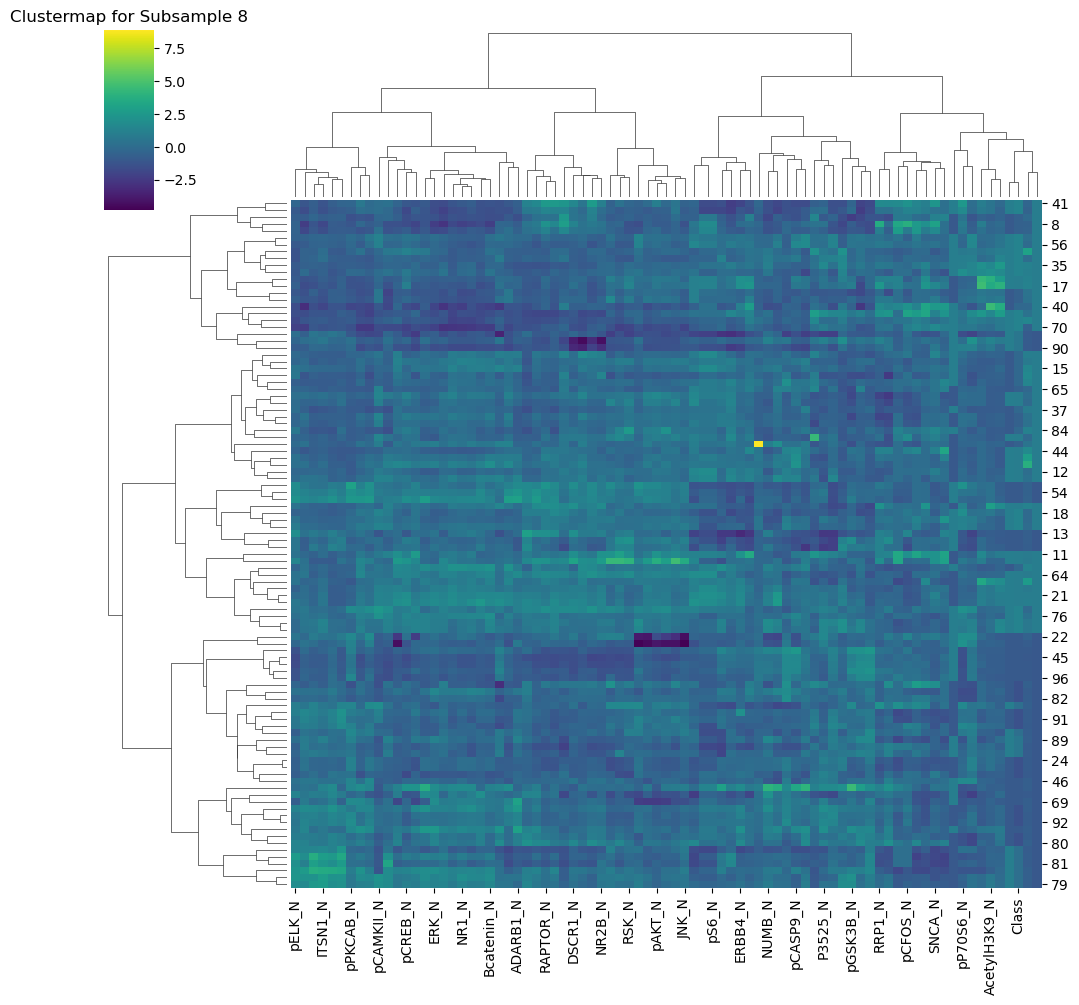

C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

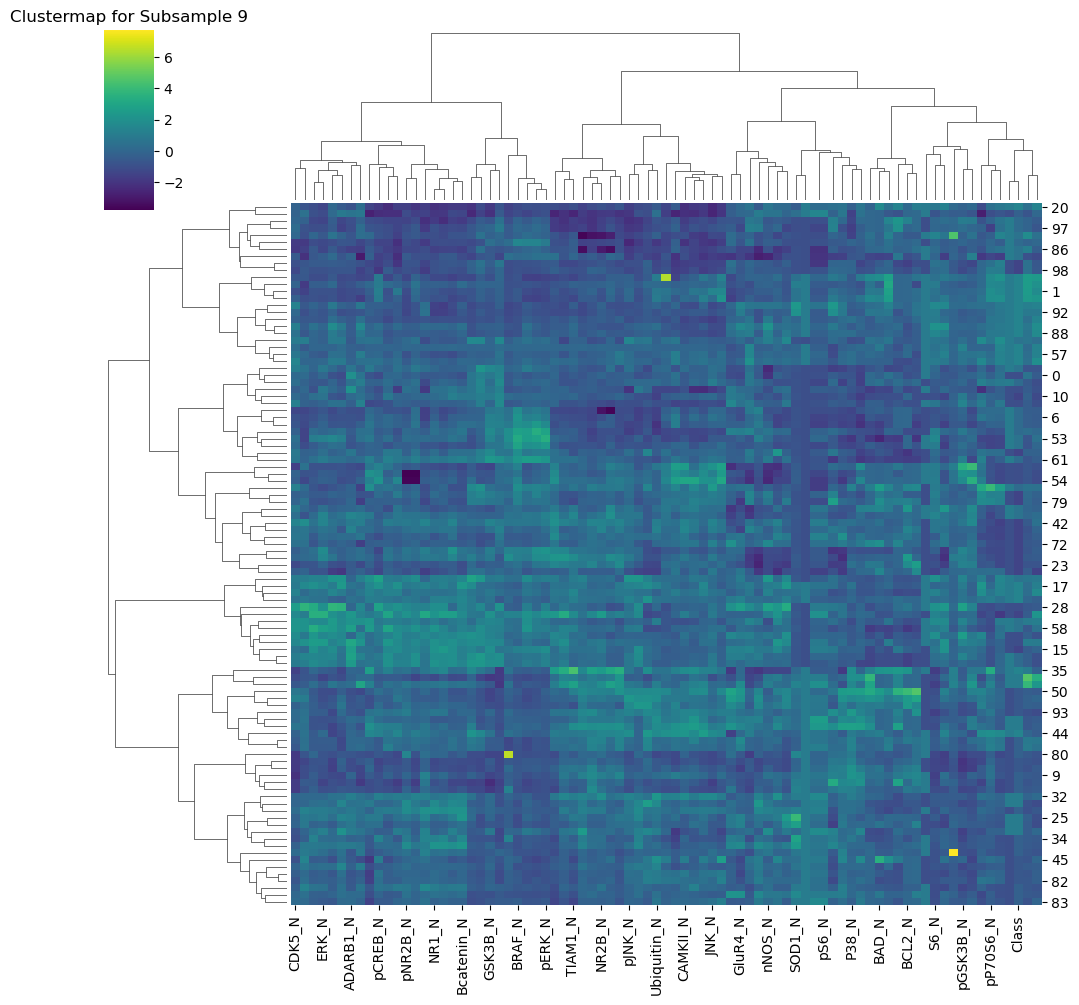

C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.fillna(subsample.mean(), inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Cait\AppData\Local\Temp\ipykernel_19640\1377605223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

<Figure size 1000x800 with 0 Axes>

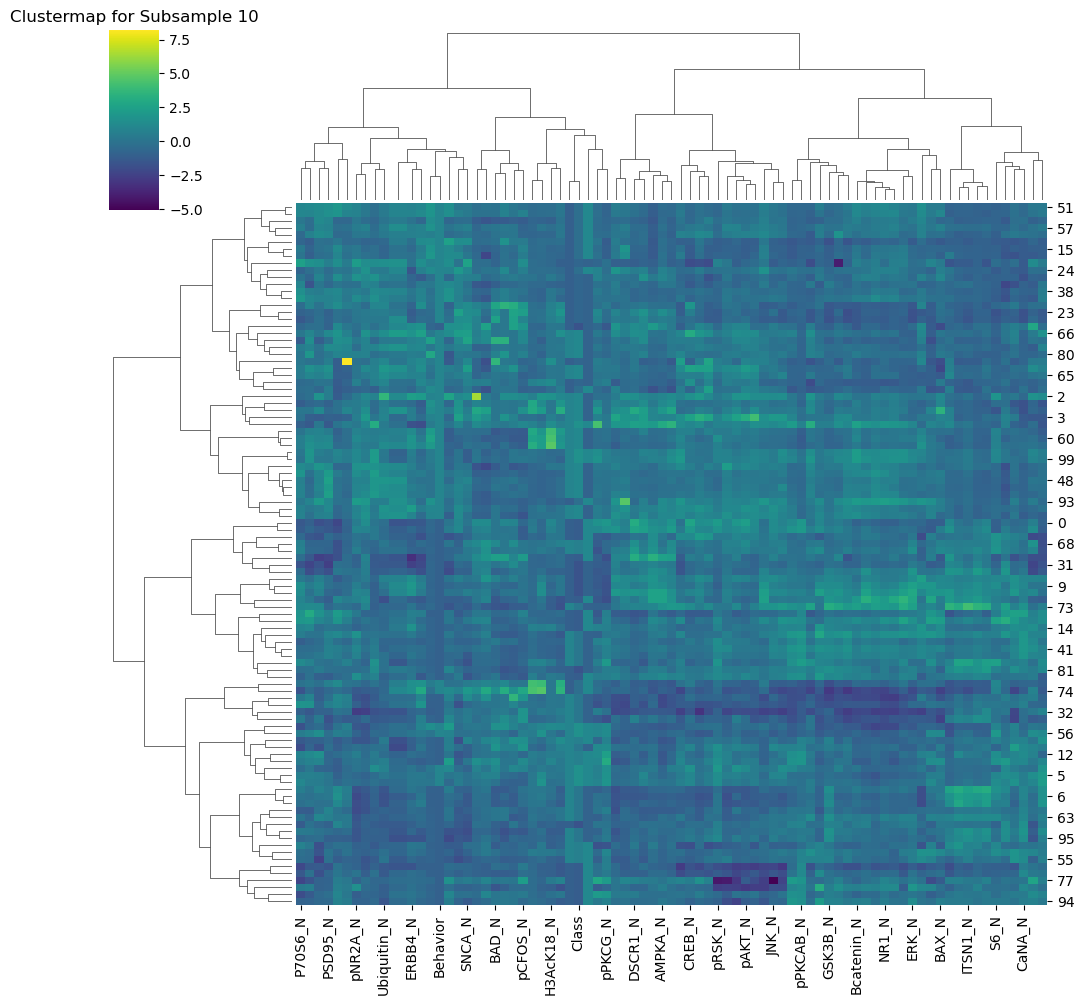

In [30]:
np.random.seed(42)
subsample_indices = [np.random.choice(df.index, size=100, replace=False) for _ in range(10)]

# Create a clustermap for each subsample
for i, indices in enumerate(subsample_indices):
    subsample = df.iloc[indices]
    
    # Handle missing and infinite values as previously described
    subsample.fillna(subsample.mean(), inplace=True)
    subsample.replace([np.inf, -np.inf], np.nan, inplace=True)
    subsample.fillna(subsample.max(), inplace=True)
    
    # Scale the data
    scaler = StandardScaler()
    subsample_scaled = scaler.fit_transform(subsample)
    subsample_scaled = pd.DataFrame(subsample_scaled, columns=subsample.columns)
    
    # Create the clustermap
    plt.figure(figsize=(10, 8))
    g = sns.clustermap(subsample_scaled, method='ward', metric='euclidean', cmap='viridis',
                       figsize=(10, 10))
    plt.title(f'Clustermap for Subsample {i + 1}')
    plt.show()

$\textbf{ASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch}$

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Features and target variable
X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)


print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        27
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        31

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [32]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  # Kernel coefficient
    'kernel': ['rbf']  # Type of SVM
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=3, cv=3)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: {:.2f}".format(grid_search.best_score_))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.767 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.726 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.767 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.726 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.747 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.694 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.142 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.142 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;

In [33]:
# Predict using the best model
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Evaluate the optimized model
print(classification_report(y_test, y_pred_optimized))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        27
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        31

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

